In [1]:
import bw2data, bw2calc, bw2io
from brightway2 import projects, Database, LCA
from edges import EdgeLCIA, get_available_methods
from bw2analyzer.contribution import ContributionAnalysis

In [3]:
projects.set_current("intermediate_flows")
act = bw2data.Database("ecoinvent-3.10-cutoff").random()
act

'beam, hardwood, raw, kiln drying to u=10%' (cubic meter, CH, None)

In [4]:
method = ('GeoPolRisk', 'paired', '2024')
LCA = EdgeLCIA({act: 1}, method)
LCA.lci()
LCA.map_exchanges()
LCA.map_aggregate_locations()
LCA.map_dynamic_locations()
LCA.map_remaining_locations_to_global()
LCA.evaluate_cfs()
LCA.lcia()

Identifying eligible exchanges...


100%|██████████████████████████████████████████████████████████████████████████| 51932/51932 [00:10<00:00, 4867.85it/s]


0 processed biosphere edges
161 processed technosphere edges
Handling static regions...


Processing static groups (pass 1): 0it [00:00, ?it/s]
Processing remaining static edges (pass 2): 0it [00:00, ?it/s]
Processing remaining static edges (pass 2): 100%|███████████████████████████████| 37645/37645 [04:55<00:00, 127.51it/s]


0 processed biosphere edges
227 processed technosphere edges
Handling dynamic regions...


Processing remaining dynamic edges (pass 2): 100%|██████████████████████████████| 67916/67916 [09:44<00:00, 116.16it/s]


0 processed biosphere edges
309 processed technosphere edges
Handling remaining exchanges...


Processing remaining global edges (pass 2): 100%|█████████████████████████████| 154761/154761 [21:23<00:00, 120.62it/s]


0 processed biosphere edges
624 processed technosphere edges


In [5]:
df = LCA.generate_cf_table()

In [14]:
len(df)

169

In [15]:
df

,supplier name,supplier reference product,supplier location,consumer name,consumer reference product,consumer location,amount,CF,impact
0,antimony production,antimony,CN,market for antimony,antimony,GLO,3.984723e-10,3.035590e-02,1.209599e-11
1,"asbestos production, chrysotile type","asbestos, chrysotile type",GLO,"market for asbestos, chrysotile type","asbestos, chrysotile type",GLO,1.225771e-07,2.439718e-01,2.990534e-08
2,boron carbide production,boron carbide,GLO,market for boron carbide,boron carbide,GLO,2.113312e-09,4.938188e+02,1.043593e-06
3,"cadmium production, primary",cadmium,CA-QC,market for cadmium,cadmium,GLO,6.285507e-14,1.158364e-03,7.280906e-17
4,hard coal preparation plant construction,hard coal preparation plant,GLO,market for hard coal preparation plant,hard coal preparation plant,GLO,1.377996e-13,1.015435e-01,1.399265e-14
...,...,...,...,...,...,...,...,...,...
164,gold production,gold,TZ,market for gold,gold,GLO,4.594353e-10,4.526228e-01,2.079509e-10
165,gypsum quarry operation,"gypsum, mineral",CH,"market for gypsum, mineral","gypsum, mineral",RER,7.608096e-05,1.983266e-07,1.508888e-11
166,gypsum quarry operation,"gypsum, mineral",ZA,"market for gypsum, mineral","gypsum, mineral",ZA,3.834755e-07,9.483511e-05,3.636694e-11
167,lignite mine operation,lignite,IN,market for lignite,lignite,IN,5.365519e-03,9.089070e-05,4.876757e-07


In [20]:
df.groupby(["supplier location", "consumer location"])["impact"].mean()

supplier location  consumer location
AE                 IN                   2.759639e-08
                   ZA                   9.305632e-10
AR                 IN                   1.088816e-11
AU                 GLO                  1.043139e-08
AZ                 IN                   1.765720e-10
                                            ...     
VE                 IN                   6.034604e-09
ZA                 GLO                  9.280561e-08
                   IN                   2.866718e-09
                   ZA                   1.443379e-11
ZM                 GLO                  8.038155e-09
Name: impact, Length: 89, dtype: float64

In [6]:
LCA.statistics()

+----------------------+---------------------------------------+
|       Activity       | petroleum and gas production, onshore |
|     Method name      |    ('GeoPolRisk', 'paired', '2024')   |
|      Data file       |         GeoPolRisk_paired_2024        |
| Unique CFs in method |                 49709                 |
|   Unique CFs used    |                  102                  |
|  Exc. characterized  |                  162                  |
| Exc. uncharacterized |                 154768                |
+----------------------+---------------------------------------+


In [4]:
LCA.score

0.0005641326325451241

In [6]:
df = LCA.generate_cf_table()

Matrix type: technosphere


In [7]:
df

,supplier name,supplier reference product,supplier location,consumer name,consumer reference product,consumer location,amount,CF,impact
0,"petroleum and gas production, offshore",petroleum,ID,market for petroleum,petroleum,IN,-1.129767e-06,6.723977e-05,-7.596530e-11
1,"petroleum and gas production, offshore",petroleum,TH,market for petroleum,petroleum,IN,-1.036919e-06,7.898786e-12,-8.190400e-18
2,"petroleum and gas production, onshore",petroleum,SA,market for petroleum,petroleum,BR,-2.399519e-06,1.227931e-03,-2.946443e-09
3,"petroleum and gas production, onshore",petroleum,SA,market for petroleum,petroleum,ZA,-1.254431e-05,2.285224e-02,-2.866655e-07
4,"petroleum and gas production, onshore",petroleum,SA,market for petroleum,petroleum,PE,-2.068469e-06,6.817011e-04,-1.410077e-09
...,...,...,...,...,...,...,...,...,...
194,"petroleum and gas production, offshore",petroleum,NO,market for petroleum,petroleum,IN,-5.025072e-06,7.372771e-05,-3.704870e-10
195,"petroleum and gas production, onshore",petroleum,RU,market for petroleum,petroleum,BR,-7.217575e-07,1.456921e-05,-1.051543e-11
196,"petroleum and gas production, onshore",petroleum,RU,market for petroleum,petroleum,Europe without Switzerland,-1.462297e-04,1.301296e-02,-1.902881e-06
197,"petroleum and gas production, onshore",petroleum,RU,market for petroleum,petroleum,IN,-9.013289e-06,3.339948e-03,-3.010392e-08


In [5]:
LCA.statistics()

+----------------------+--------------------------------------------+
|       Activity       | market for bottom ash, MSWI-WWT, rainwater |
|                      |            mineral oil storage             |
|     Method name      |      ('GeoPolRisk', 'paired', '2024')      |
|      Data file       |           GeoPolRisk_paired_2024           |
| Unique CFs in method |                   49709                    |
|   Unique CFs used    |                    123                     |
|  Exc. characterized  |                    200                     |
| Exc. uncharacterized |                    119                     |
+----------------------+--------------------------------------------+


'hard coal, import from Australia' (kilogram, IN, None)


/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 4.83e+13)
  warnings.warn(msg, UmfpackWarning)


Identifying eligible exchanges...


100%|██████████| 51074/51074 [00:00<00:00, 142835.25it/s]


Handling static regions...


Processing locations: 0it [00:00, ?it/s]
Processing locations: 100%|██████████| 308/308 [00:00<00:00, 1183.55it/s]


Handling dynamic regions...


Processing dynamic edges: 0it [00:00, ?it/s]
Processing dynamic edges: 100%|██████████| 154764/154764 [00:00<00:00, 488838.93it/s]


Handling remaining exchanges...


Processing remaining global edges: 0it [00:00, ?it/s]
Processing remaining global edges: 100%|██████████| 154764/154764 [00:00<00:00, 355017.77it/s]


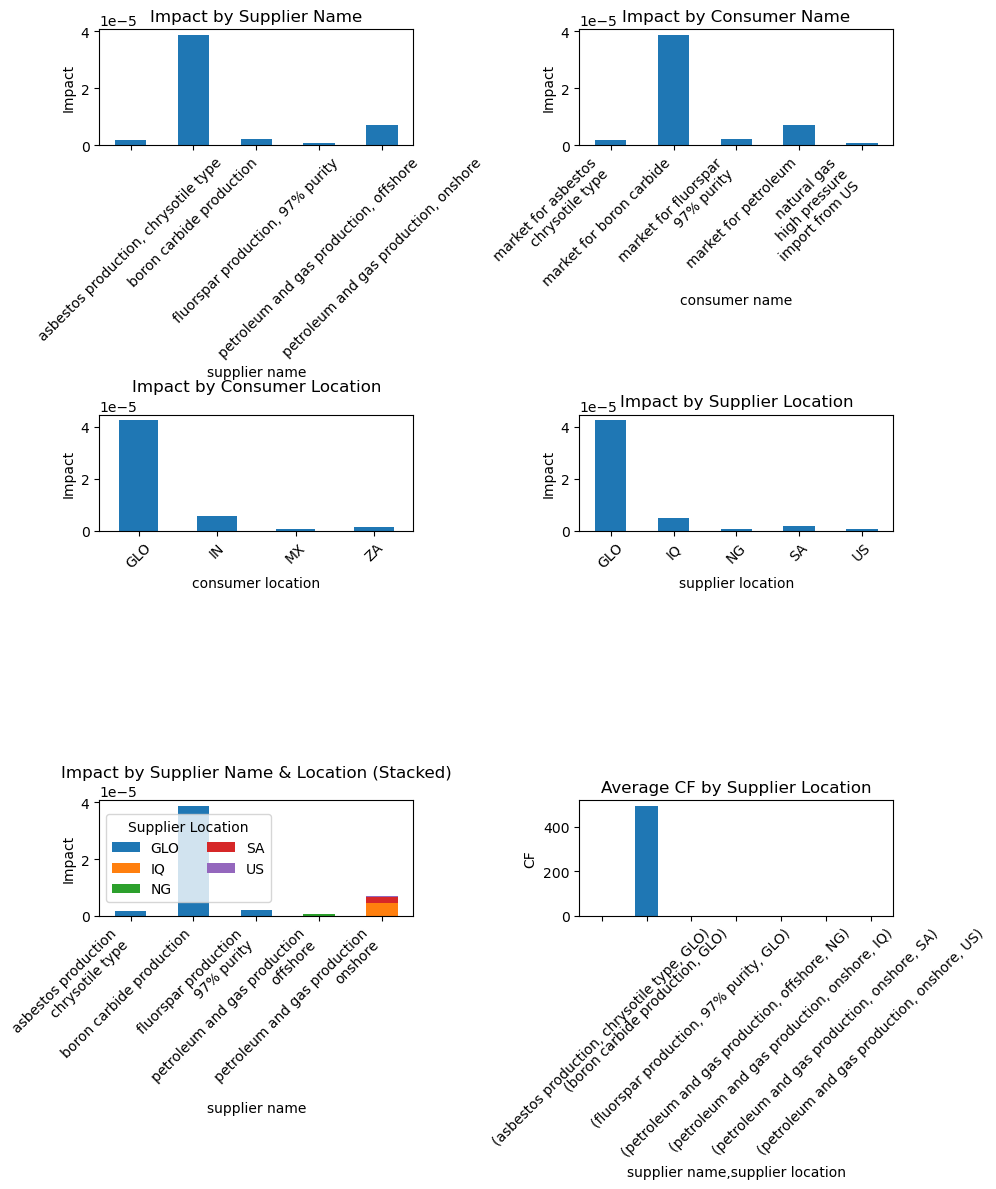

In [10]:
import matplotlib.pyplot as plt
methods = [('GeoPolRisk', 'paired', '2024'),]
bw2data.projects.set_current("ecoinvent-3.10-cutoff")
act = bw2data.Database("ecoinvent-3.10.1-cutoff").random()
print(act)
for method in methods:
    LCA = EdgeLCIA({act: 1}, method)
    LCA.lci()
    LCA.map_exchanges()
    LCA.map_aggregate_locations()
    LCA.map_dynamic_locations()
    LCA.map_remaining_locations_to_global()
    LCA.evaluate_cfs()
    LCA.lcia()
    df = LCA.generate_cf_table()

    cutoff = 0.01

    # remove rows for which "amount" is below the cutoff
    total = df["impact"].sum()
    df = df[df["impact"] > cutoff * total]

    # Plotting
    fig, axes = plt.subplots(3, 2, figsize=(10, 12))

    # 1. Bar plot of "amount" by "supplier name"
    df.groupby("supplier name")["impact"].sum().plot(kind="bar", ax=axes[0, 0])
    axes[0, 0].set_title("Impact by Supplier Name")
    axes[0, 0].set_ylabel("Impact")
    axes[0, 0].tick_params(axis="x", rotation=45)

    # 2. Bar plot of "amount" by "consumer name"
    df.groupby("consumer name")["impact"].sum().plot(kind="bar", ax=axes[0, 1])
    axes[0, 1].set_title("Impact by Consumer Name")
    axes[0, 1].set_ylabel("Impact")
    axes[0, 1].set_xticklabels(
        [label.get_text().replace(", ", "\n") for label in axes[0, 1].get_xticklabels()],
        rotation=45,
        ha="right",
    )

    # 3. Bar plot of "impact" by "consumer location"
    df.groupby("consumer location")["impact"].sum().plot(kind="bar", ax=axes[1, 0])
    axes[1, 0].set_title("Impact by Consumer Location")
    axes[1, 0].set_ylabel("Impact")
    axes[1, 0].tick_params(axis="x", rotation=45)


    # 3. Bar plot of "impact" by "supplier location"
    df.groupby("supplier location")["impact"].sum().plot(kind="bar", ax=axes[1, 1])
    axes[1, 1].set_title("Impact by Supplier Location")
    axes[1, 1].set_ylabel("Impact")
    axes[1, 1].tick_params(axis="x", rotation=45)


    # 4. Stacked bar plot for "amount" by "consumer name" and "consumer location"
    df_grouped = df.groupby(["supplier name", "supplier location"])["impact"].sum().unstack()
    df_grouped.plot(kind="bar", stacked=True, ax=axes[2, 0])
    axes[2, 0].set_title("Impact by Supplier Name & Location (Stacked)")
    axes[2, 0].set_ylabel("Impact")
    axes[2, 0].set_xticklabels(
        [label.get_text().replace(", ", "\n") for label in axes[2, 0].get_xticklabels()],
        rotation=45,
        ha="right",
    )
    axes[2, 0].legend(title="Supplier Location", loc="center left", ncol=2)

    # 5. Bar plot of average "CF" by "consumer location"
    df.groupby(["supplier name", "supplier location"])["CF"].mean().plot(kind="bar", ax=axes[2, 1])
    axes[2, 1].set_title("Average CF by Supplier Location")
    axes[2, 1].set_ylabel("CF")
    axes[2, 1].tick_params(axis="x", rotation=45)


    plt.tight_layout()
    plt.show()

    

  #LCA.score

In [8]:
df.sort_values(by="impact", ascending=False).loc[:, "supplier name"]

157    platinum group metal, extraction and refinery ...
118                     fluorspar production, 97% purity
10                                     cobalt production
97                 petroleum and gas production, onshore
2                               boron carbide production
87                 petroleum and gas production, onshore
158    rare earth element mine operation and benefici...
67                petroleum and gas production, offshore
47                 petroleum and gas production, onshore
86                petroleum and gas production, offshore
96                petroleum and gas production, offshore
Name: supplier name, dtype: object

In [7]:
df.loc[df["consumer name"] == "soybean production"]

,supplier name,supplier categories,consumer name,consumer reference product,consumer location,amount,CF,impact
1409,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-MT,0.000133,150.878435,0.020124
1427,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-RS,0.000048,150.878435,0.007286
1436,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-GO,0.000048,150.878435,0.007317
1437,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-SP,0.000015,150.878435,0.002307
1443,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-PI,0.000011,150.878435,0.001602
1447,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-MS,0.000041,150.878435,0.006151
1454,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-TO,0.000013,150.878435,0.001909
1470,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-BA,0.000024,150.878435,0.003546


In [10]:
df.sort_values("amount", ascending=False)

,supplier name,supplier categories,consumer name,consumer reference product,consumer location,amount,CF,impact
1790,"Transformation, to mineral extraction site","(natural resource, land)",onshore petroleum field infrastructure constru...,onshore petroleum field infrastructure,GLO,0.000138,108.941609,0.015058
1409,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-MT,0.000133,150.878435,0.020124
1436,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-GO,0.000048,150.878435,0.007317
1427,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-RS,0.000048,150.878435,0.007286
1447,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-MS,0.000041,150.878435,0.006151
1419,"Transformation, to annual crop","(natural resource, land)","pipeline construction, natural gas, high press...","pipeline, natural gas, high pressure distribut...",RoW,0.000031,150.708486,0.004637
1470,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-BA,0.000024,150.878435,0.003546
1793,"Transformation, to mineral extraction site","(natural resource, land)","onshore well production, oil/gas","onshore well, oil/gas",GLO,0.000023,108.941609,0.002548
1437,"Transformation, to annual crop","(natural resource, land)",soybean production,soybean,BR-SP,0.000015,150.878435,0.002307
1731,"Transformation, to heterogeneous, agricultural","(natural resource, land)","pipeline construction, petroleum","pipeline, petroleum",RER,0.000013,62.932928,0.000828


In [8]:
df["CF"].unique()

array([150.87843498, 150.70848584, 314.37457713,  62.9329279 ,
       166.60068556, 108.9416093 , 170.95081809])

In [16]:
df.groupby(["supplier name", "consumer location"])["CF"].mean()

supplier name   consumer location         
Sulfur dioxide  Europe without Switzerland     4.368280
                GLO                            2.481095
                RU                            24.675845
Name: CF, dtype: float64

In [21]:
list(LCA.demand.keys())[0]

124526838126026753

In [1]:
from constructive_geometries import geomatcher
geo = geomatcher.Geomatcher()

geo.within("PG", biggest_first=False)

['PG', ('ecoinvent', 'UN-MELANESIA'), ('ecoinvent', 'UN-OCEANIA'), 'GLO']

In [2]:
geo.contained("PG", biggest_first=False)

['PG']

In [6]:
set([x["supplier"]["name"] for x in LCA.ignored_method_exchanges])

{'Water',
 'Water, cooling, unspecified natural origin',
 'Water, in air',
 'Water, lake',
 'Water, river',
 'Water, turbine use, unspecified natural origin',
 'Water, unspecified natural origin',
 'Water, well, in ground'}

In [7]:
LCA.generate_cf_table()

Matrix type: biosphere


,supplier name,supplier categories,consumer name,consumer reference product,consumer location,amount,CF,impact
0,"Water, cooling, unspecified natural origin","(natural resource, in water)","particleboard production, uncoated, from virgi...","particleboard, uncoated",RoW,6.544631e-11,20.179399,1.320667e-09
1,"Water, cooling, unspecified natural origin","(natural resource, in water)","heat and power co-generation, lignite","electricity, high voltage",SI,1.453419e-07,1.087201,1.580158e-07
2,"Water, cooling, unspecified natural origin","(natural resource, in water)",atrazine production,atrazine,RoW,4.228744e-12,19.819034,8.380961e-11
3,"Water, cooling, unspecified natural origin","(natural resource, in water)","sheet rolling, copper","sheet rolling, copper",RoW,1.290820e-10,19.819034,2.558280e-09
4,"Water, cooling, unspecified natural origin","(natural resource, in water)","phosphoric acid production, dihydrate process","phosphoric acid, fertiliser grade, without wat...",MA,5.123237e-08,54.031045,2.768139e-06
...,...,...,...,...,...,...,...,...
4923,"Water, in air","(natural resource, in air)",soy-based resin production,"polyester resin, unsaturated",US,4.729868e-16,9.087076,4.298067e-15
4924,"Water, in air","(natural resource, in air)",soy-based resin production,"polyester resin, unsaturated",RoW,1.378576e-15,20.175187,2.781303e-14
4925,"Water, in air","(natural resource, in air)",clinker production,clinker,RoW,1.625316e-09,20.627229,3.352577e-08
4926,"Water, in air","(natural resource, in air)","particleboard production, cement bonded","particleboard, cement bonded",RER,8.635607e-19,6.750246,5.829247e-18


In [7]:
LCA.ignored_locations

set()

In [9]:
method = ('AWARE 1.2c', 'Country', 'mixed', 'yearly')
convmethod = (
  # 'ecoinvent-3.10',
  'EF v3.1 EN15804',
  'water use',
  'user deprivation potential (deprivation-weighted water consumption)')

In [10]:
import bw2calc

convLCA = bw2calc.LCA({act: 1}, convmethod)
convLCA.lci()
convLCA.lcia()
convLCA.score

/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 4.83e+13)
  warnings.warn(msg, UmfpackWarning)


0.06176615560312869